# Trabalho TCC USP

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS
#!pip3 install -U pyFTS
!pip3 install SimpSOM
!pip install dispy
#!pip install matplotlib==3.1.3
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-7xwdx06m
  Running command git clone --filter=blob:none --quiet https://github.com/PYFTS/pyFTS /tmp/pip-req-build-7xwdx06m
  Resolved https://github.com/PYFTS/pyFTS to commit 4c77ecc73fa0888132ac3996ca7e1f519dcf2fc8
  Preparing metadata (setup.py) ... done
  Created wheel for pyFTS: filename=pyFTS-1.7-py3-none-any.whl size=217871 sha256=09007000101c91d60c37e1b6c859d8e3d384fe1f1d18c164f3bc0a8e4ac5a30d
  Stored in directory: /tmp/pip-ephem-wheel-cache-lhstly75/wheels/7f/25/75/dd8f713bf48592da71e0441c7abdc1f5aa4d9645a6b7ee99d4
Successfully built pyFTS
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.9/427.9 kB 8.6 MB/s eta 0:00:00
  In

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures

In [30]:
from pyFTS.data import TAIEX, Malaysia, sunspots, artificial
from statsmodels.tsa.stattools import acf, pacf

datasets = {}

#dff = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosFalha.xlsx')
dff = pd.read_csv('../content/drive/MyDrive/TCCPriscila/Teste_Daily_Country_Wise_Confirmed_Cases.csv', ';')

#dfn = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosNormais.xlsx')
#dfn = pd.read_csv('../content/drive/MyDrive/TCCPriscila/Teste_Daily_Country_Wise_Confirmed_Cases.csv', ';')

dados = dff[0:112] 
#dados_teste_Falha = dff[0:112]

#dados_treino_Normal = dfn[0:112] 
#dados_teste_Normal = dfn[0:112]

In [33]:
print(dados)#print dados

                      Country  23/05/2022  24/05/2022  25/05/2022  26/05/2022  \
0                     Nigeria           0           0           0           0   
1                    Cameroon           0           0           0           0   
2    Central African Republic           0           0           0           0   
3           Republic of Congo           0           0           0           0   
4                     England          36          14           7          24   
..                        ...         ...         ...         ...         ...   
107                    Jordan           0           0           0           0   
108                      Guam           0           0           0           0   
109                   Ukraine           0           0           0           0   
110                   Bahrain           0           0           0           0   
111                     China           0           0           0           0   

     27/05/2022  28/05/2022

###Analisando as Séries Temporais

IndexError: ignored

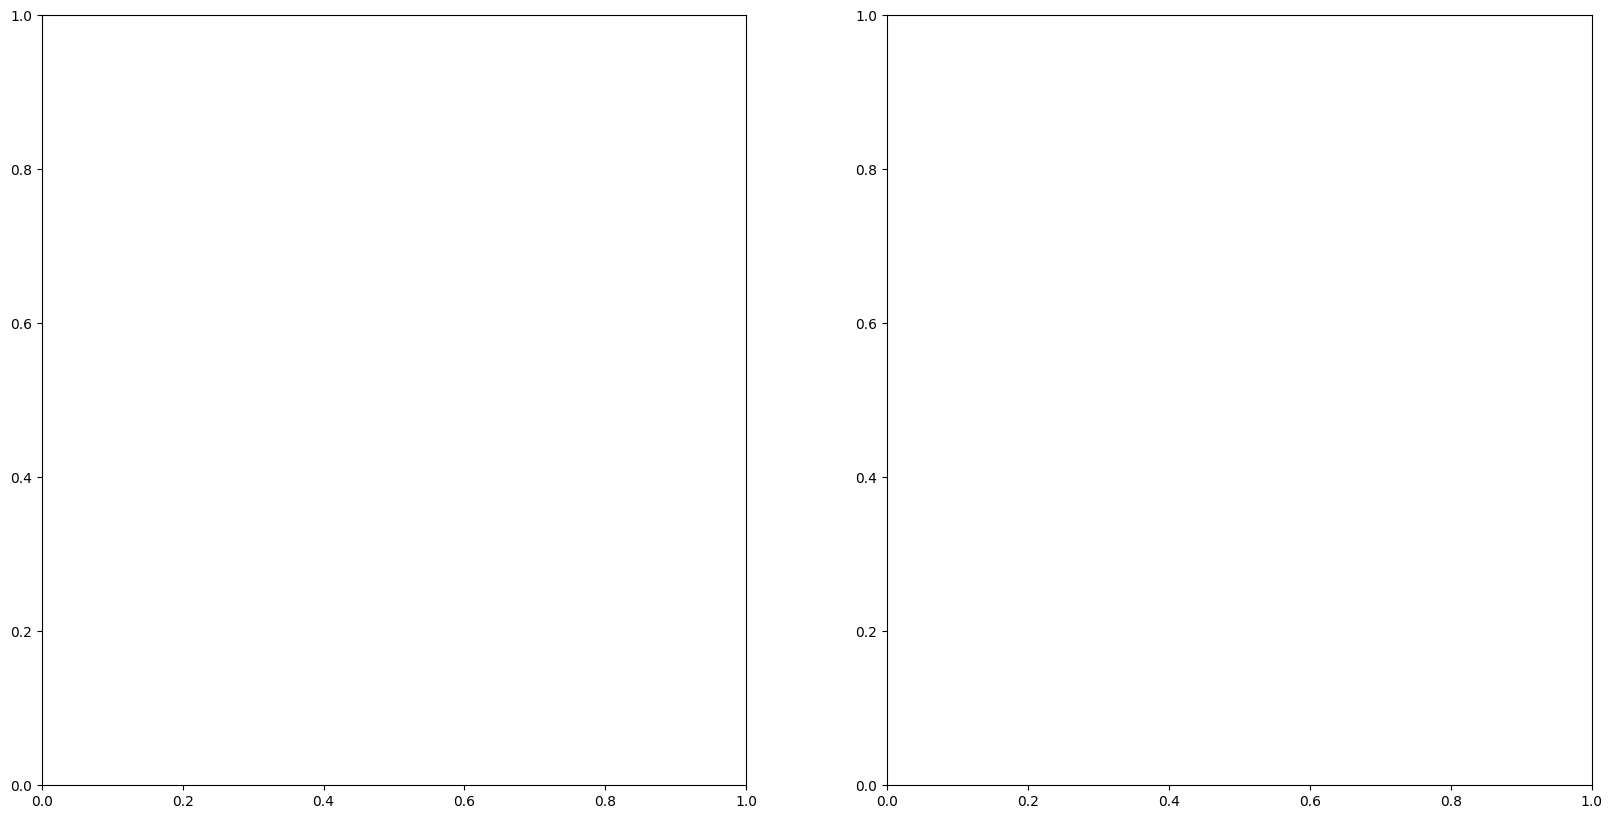

In [28]:
#Dados com Falhas

from pyFTS.data import TAIEX, Malaysia, sunspots, artificial
from statsmodels.tsa.stattools import acf, pacf

datasets1 = {}

datasets1['LIT'] = dados
datasets1['SpeedActual'] = dados_treino_Falha.get('perc_change_conf_cases')
#datasets1['BeltLoad'] = dados_treino_Falha.get('WIT_1085KS_2300_BeltLoad')
#datasets1['Rate'] = dados_treino_Falha.get('WIT_1085KS_2300_Rate')


fig1, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,10])

for ct, (key, data) in enumerate(datasets1.items()): 
  _lags = np.arange(0,21)
  _acf = acf(data,nlags=21)
  _pacf = pacf(data,nlags=21)
  
  ax[0].set_title("IO")
  ax[0].plot(data)
  
  ax[1].set_title("OI")
  ax[1].plot(data[:21])
  
  #ax[2][ct].set_title("ACF {} - 100 lags".format(key))
  #ax[2][ct].plot(_lags, _acf, "o")
  #ax[2][ct].vlines(_lags,[0],_acf)
  #ax[2][ct].axhline(y=0, color='black')
  
 # ax[3][ct].set_title("PACF {} - 100 lags".format(key))
 # ax[3][ct].plot(_lags, _pacf, "o")
 # ax[3][ct].vlines(_lags,[0],_pacf)
 # ax[3][ct].axhline(y=0, color='black')

plt.tight_layout()